In [1]:
from sklearn.svm import SVR
from src.Dataset import Dataset
from src.Evolution import Evolution
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import shap

(7036, 85)


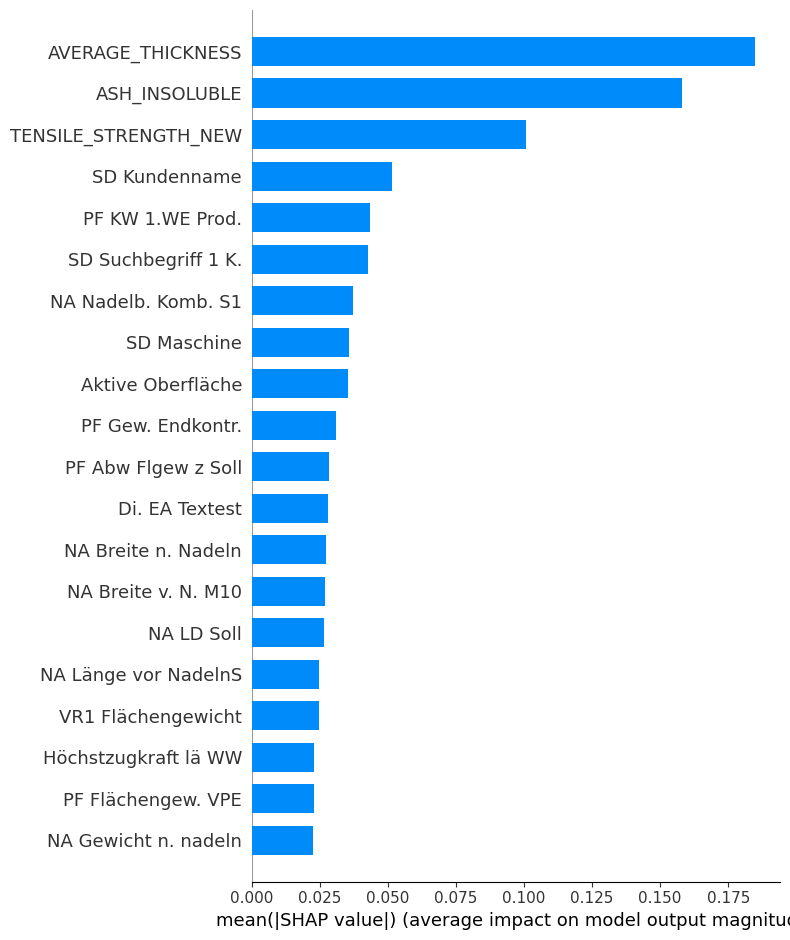

Shapley Values Berechnungszeit: 12.65


In [2]:
#Vorverarbeitete Daten aus CSV auslesen
df = pd.read_csv("data/df_preprocessed_all.csv", sep = ",")
df = df.drop(columns=['FELT_LIFE','REMOVAL_DATE', 'INSTALLATION_DATE', 'REPORT_DATE'])

#Das Label nennen
label = df.columns.get_loc('FELT_LIFE_NET')

#Machine Learning Algorithms die benutzt werden
MLA = [
    #('Linear Regressor',LinearRegression()),
    #('SVR', SVR(kernel='linear')),
    #('Random Forest',RandomForestRegressor()),
    ('Gradient Boosting', xgb.XGBRegressor())
]

evaluation = ['train', 'cv_train', 'cv_test', 'validation', 'test']
header = df.columns


features_df = pd.read_csv("data/PSO/20_FS_pso_Features.csv", sep = ",") #Hier den Feature-Selection Algorithmus ändern
feature_indexes_dict = {}


# Features der Modelle auslesen
for model_name, model_instance in MLA:
    
    feature_names_current_model = features_df[model_name].dropna().tolist()
    
    feature_indexes = [df.columns.get_loc(feature_name) for feature_name in feature_names_current_model]
    feature_indexes_dict[model_name] = feature_indexes
    

# Für alle Modelle in MLA die ShapleyValues berechnen
for model_name, model_instance in MLA:
    
    dataset = Dataset(df, 'df', label, divide_dataset=False, header=header)

    dataset.divide_dataset(model_instance, normalize=False, shuffle=True, all_features=True, all_instances=True, evaluate=False, partial_sample=False,folds=5)
    
    dataset.set_features(feature_indexes_dict[model_name])
    
    #Regressor trainieren
    dataset.fit_classifier()
    
    dataset.shapley_values()
    